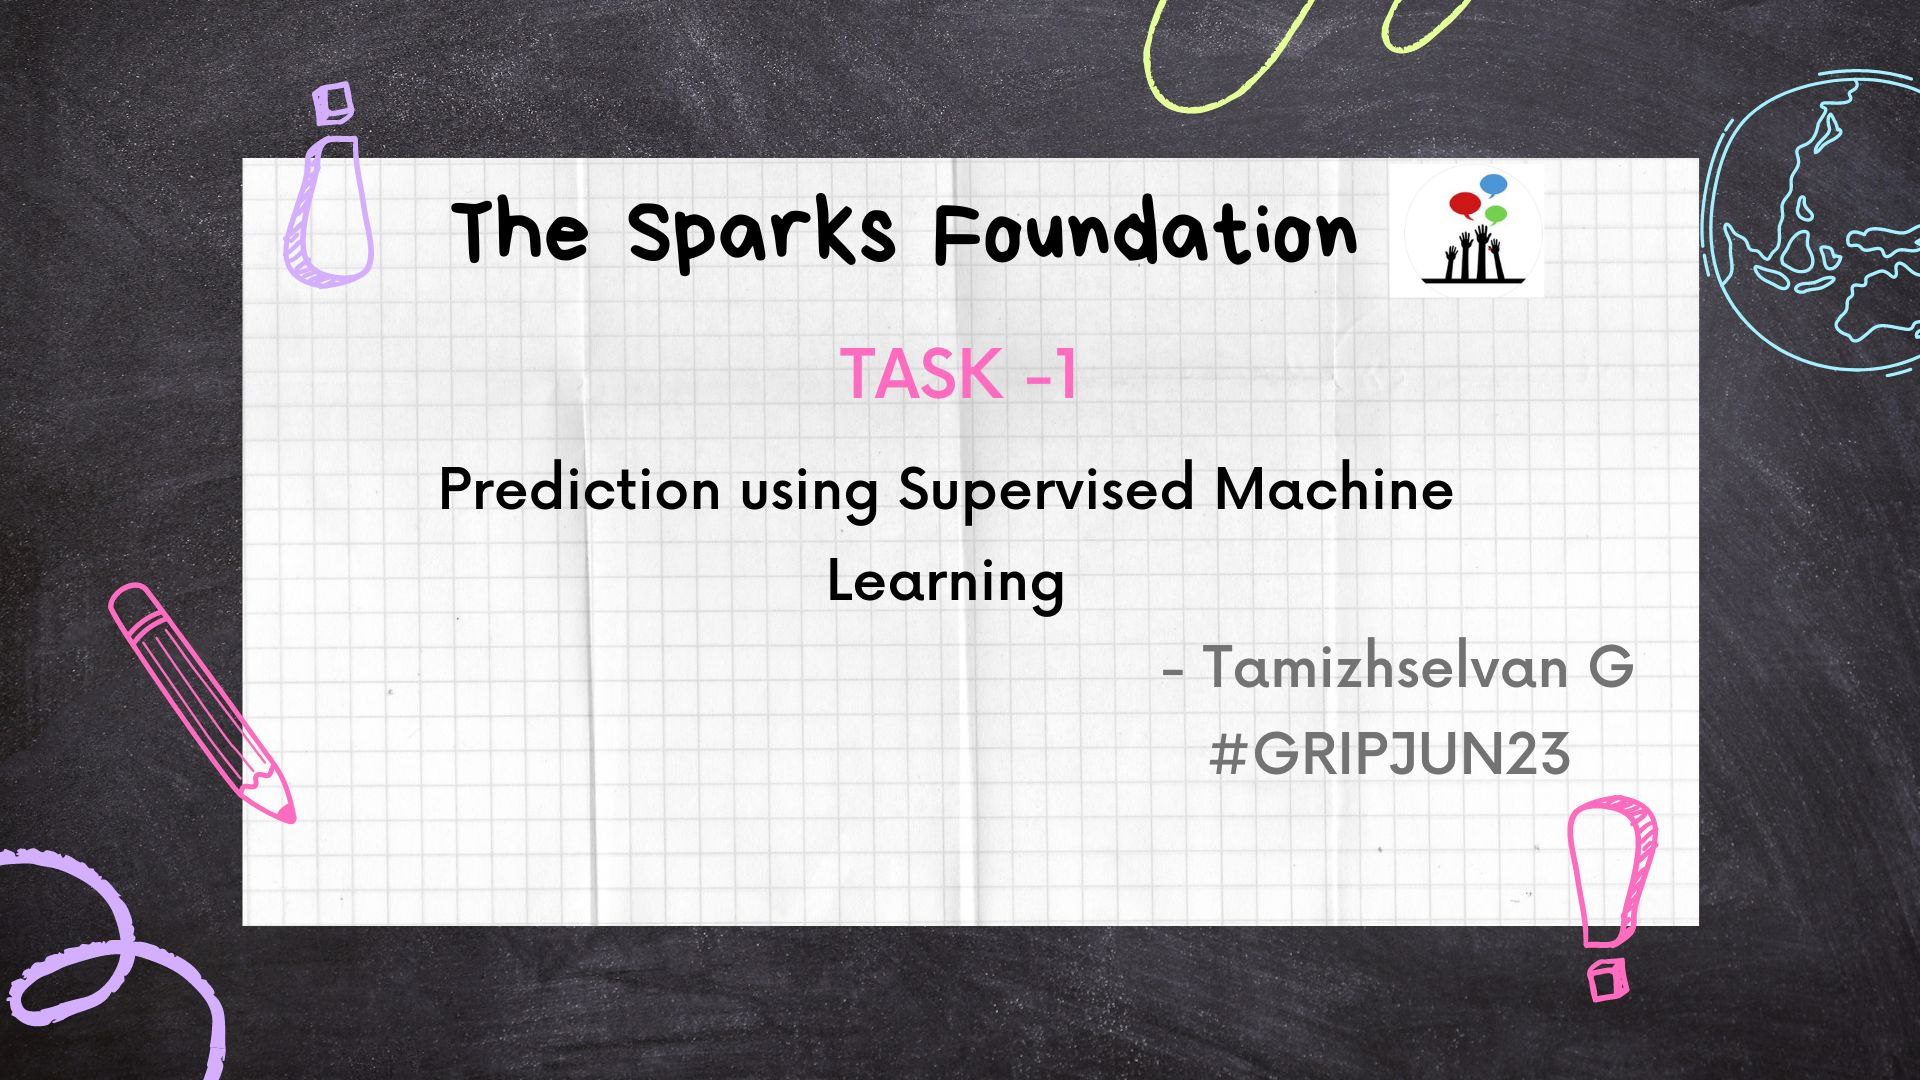

# Loading the required libraries.

In [2]:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#To ignore the warnings
import warnings as wg 
wg.filterwarnings("ignore")

# Importing the dataset and analyze it.

In [3]:
df = pd.read_csv("student_scores.csv")

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.shape

(25, 2)

In [7]:
#To find more information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#To check if there is any duplicate values in the dataset
duplicate = df.duplicated()
sum(duplicate)

0

In [10]:
#Checking if the dataset contains any null or missing values
df.isnull().sum()    

Hours     0
Scores    0
dtype: int64

# Exploratory Data Analysis

In [12]:
#Statistics Summary
df.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the dataset

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

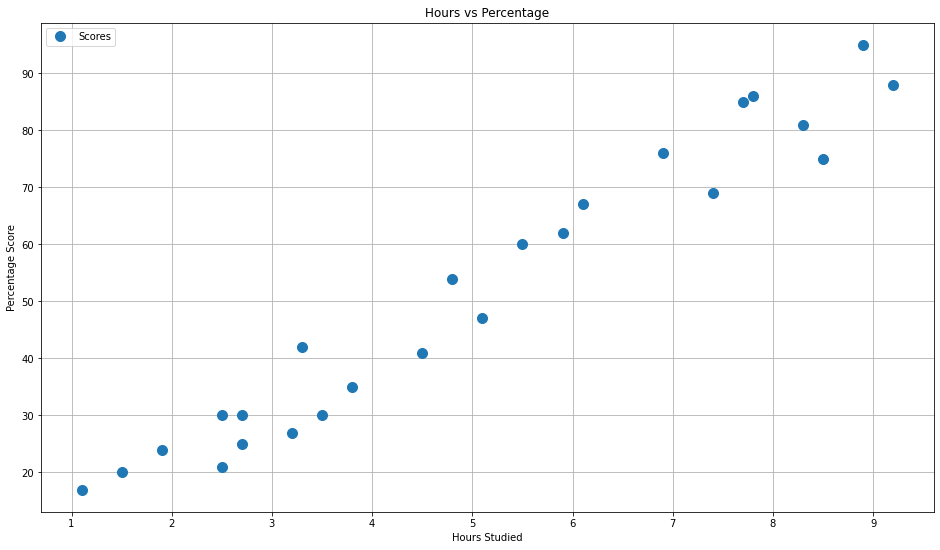

In [13]:
# Plotting the distribution of scores
plt.rcParams["figure.figsize"] = [16,9]
df.plot(x='Hours', y='Scores', style='o',markersize=10)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

**From the above graph, we can clearly see that there is a positive linear relation between the "number of hours studied" and "percentage of score".So we can use the linear regression i.e, supervised machine learning model on it to predict the further values.**

In [14]:
#Let's find the correlation between the variables.
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Preparation

**In this step we will divide the data into "features" (inputs) and "labels" (outputs). After that we will split the data into two parts - which is testing data and training data.**

In [15]:
#By using (.iloc) function we will divide the data

X = df.iloc[:, :1].values  
y = df.iloc[:, 1:].values

In [16]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [17]:
print(y)

[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [18]:
from sklearn.model_selection import train_test_split 


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [19]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()  
model.fit(X_train, y_train) 

print("Training complete.")

Training complete.


# Visusalizing the Model

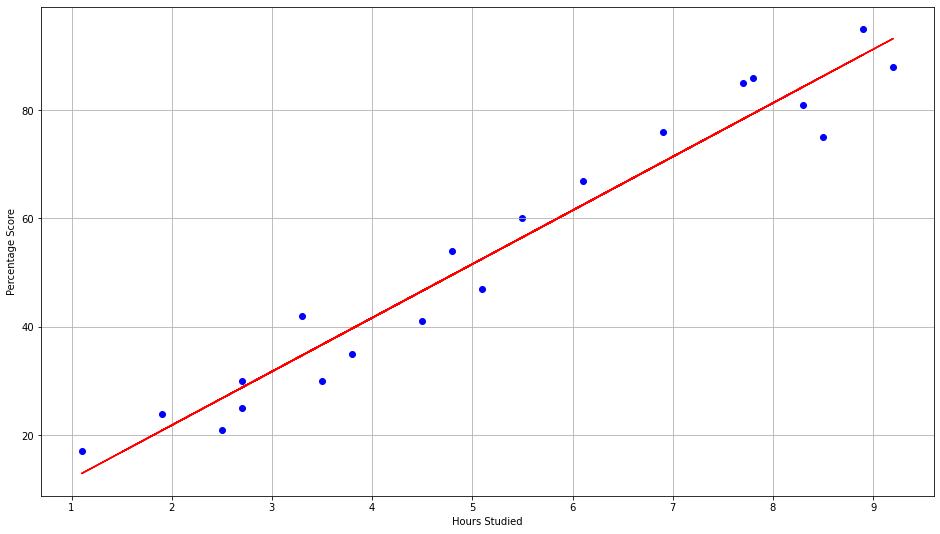

In [20]:
line = model.coef_*X+model.intercept_

# Plotting for the training data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_train, y_train,color='blue')
plt.plot(X, line,color='red');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

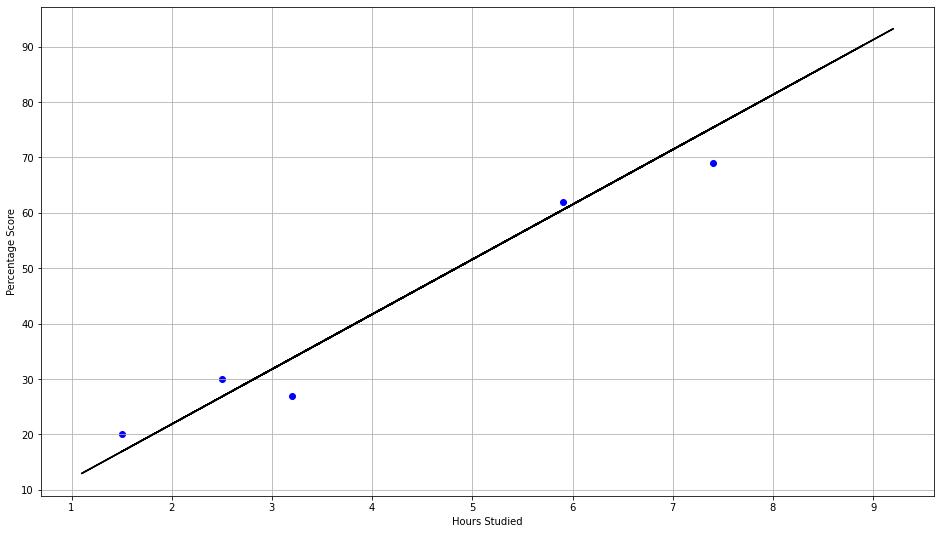

In [21]:
# Plotting for the testing data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_test,y_test,color='blue')
plt.plot(X, line,color='black');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

# Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [22]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Comparing Actual vs Predicted

In [24]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [25]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [26]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({'Actual':[ y_test], 'Predicted': [y_pred]})  
comp 

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [27]:
# We can also test with our own data
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


**Hence, We can conclude that the predicted score of a person if he studies for 9.25 hours is 93.69173249.**

# Evaluating the model

In the final step, we are going to evaluate our trained model by calculating mean absolute error.

In [28]:
from sklearn import metrics  

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
